In [57]:
import numpy as np
import pandas as pd
from scipy.stats import norm    # normal-Verteilung
from scipy.stats import t       # t-Verteitung
import scipy.io
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [58]:
"""CSV file laden"""
csv = pd.read_csv(r'data\LebensdauerGeneratoren.csv', delimiter=';')

"""Dataframe erstellen"""
df = pd.DataFrame(csv, columns = ['temp', 'mat', 'dauer'])

"""ANOVA Tabelle"""
#hier: 
#Gesucht der Einfluss von Temperatur auf Dauer C(temp)
#Gesucht der Einfluss von Material auf Dauer C(mat)
#und Geschut die Wechselwirkung Material und Dauer C(temp)*C(mat)

model = ols('dauer ~ C(temp)+C(mat) + C(temp)*C(mat)', data=df).fit() 
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(temp),31682.666667,1.0,69.632234,1.337272e-07
C(mat),2256.583333,2.0,2.479762,1.118888e-01
C(temp):C(mat),588.083333,2.0,0.646245,5.357446e-01
Residual,8190.000000,18.0,NaN,NaN


## ANOVA
-------------
|Streuung | q   | Freiheitsgrad | Varianz | v   | p
|--------|-----------|---------------|---------|-----|
| zwischen den Gruppen | $q_\alpha$ | $\sigma_\alpha² = \frac{q_\alpha}{J-1}$        | $v_0 = \frac{\sigma_\alpha}{\sigma_\epsilon}$     |$ p = (v>v_0)$   |
| zwischen den Gruppen | $q_\alpha$ | $\sigma_\alpha² = \frac{q_\alpha}{J-1}$        |       |   |

sum_sq : float64 -
    Sum of squares for model terms.
df : float64
    Degrees of freedom for model terms.
F : float64
    F statistic value for significance of adding model terms.
PR(>F) : float64
    P-value for significance of adding model terms.
'''

Beschreibung:

Liegt der p-Wert oberhalb der Grenze α, kann die Hypothese der gleichen Mittelwerte nicht verworfen werden. Der entsprechende Einflussfaktor wäre entsprechend nicht signifikant.

hier: C(temp)*C(mat) nicht signifikant (53%>5%) und C(mat) nicht signifikant (11%>5%)

<AxesSubplot:title={'center':'dauer'}, xlabel='[temp, mat]'>

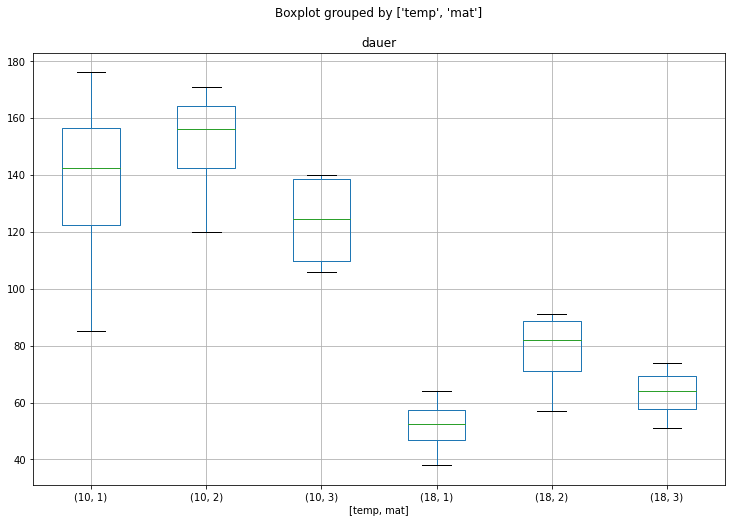

In [59]:
df.boxplot( grid=True,  figsize=(12,8), column=['dauer'], by=['temp', 'mat'])

In [60]:
df.describe()

,temp,mat,dauer
count,24.000000,24.000000,24.000000
mean,14.000000,2.000000,100.666667
std,4.086031,0.834058,43.096118
min,10.000000,1.000000,38.000000
25%,10.000000,1.000000,63.000000
50%,14.000000,2.000000,89.500000
75%,18.000000,3.000000,138.500000
max,18.000000,3.000000,176.000000


In [61]:
print(df)
df.std(ddof=1)

    temp  mat  dauer
0     10    1    135
1     10    1    150
2     10    1    176
3     10    1     85
4     18    1     50
5     18    1     55
6     18    1     64
7     18    1     38
8     10    2    150
9     10    2    162
10    10    2    171
11    10    2    120
12    18    2     76
13    18    2     88
14    18    2     91
15    18    2     57
16    10    3    138
17    10    3    111
18    10    3    140
19    10    3    106
20    18    3     68
21    18    3     60
22    18    3     74
23    18    3     51


temp      4.086031
mat       0.834058
dauer    43.096118
dtype: float64

In [62]:
test = pd.melt(df)
test

,variable,value
0,temp,10
1,temp,10
2,temp,10
3,temp,10
4,temp,18
...,...,...
67,dauer,106
68,dauer,68
69,dauer,60
70,dauer,74
